# BigMart Sales Prediction using Machine Learning

## Project Overview
Retail companies like BigMart aim to maximize product sales and profits by understanding the factors that influence store performance.  
This project builds a Machine Learning model to predict the sales of retail products based on various item and outlet characteristics.

We use regression algorithms to estimate future sales and support data-driven retail decisions.
## Objective
To analyze sales patterns using Exploratory Data Analysis (EDA)
To handle missing values and encode categorical features
To build various regression models including:
Linear Regression
Multiple Linear Regression (MLR)
Polynomial Regression
Decision Tree Regression
Random Forest Regression
To evaluate model performance using RMSE, MSE & R² Score
To identify the best model for accurate sales forecast
                          
## Problem Statement
Predict the Item Outlet Sales for each product based on attributes such as:
Item Type  
Item Weight  
Item MRP  
Item Visibility  
Outlet Location  
Outlet Size & Establishment Year  

## Dataset Description
The dataset contains retail information such as:

| Feature | Description |
|--------|-------------|
| Item_Identifier | Unique product ID |
| Item_Weight | Weight of the product |
| Item_Fat_Content | Low Fat / Regular |
| Item_Visibility | Share of shelf visibility |
| Item_Type | Category of product |
| Item_MRP | Maximum retail price |
| Outlet_Identifier | Unique store ID |
| Outlet_Size | Small / Medium / High |
| Outlet_Location_Type | Tier based location |
| Outlet_Type | Grocery / Supermarket |
| Item_Outlet_Sales | Target Variable |

Dataset Type: Supervised Learning – Regression  
Dataset Goal: Predict continuous numeric values (sales)

## Business Importance
Better sales planning & stock management  
Improved profit forecasting  
Faster decision-making for retail expansion  
Enhanced customer demand understanding  
                      
## Machine Learning Task
Regression Problem — Predict Continuous Sales Value
Models will be compared based on predictive accuracy.

## Tools & Libraries Used
Python
Pandas, NumPy
Matplotlib, Seaborn
Scikit-Learn


Kaggle DataSet Link: https://www.kaggle.com/datasets/yasserh/bigmartsalesdataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('C:/Users/kamal/OneDrive/Documents/Desktop/bigmart.csv')
#d_test = pd.read_csv('/datasets_9961_14084_Test.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(data.shape)

(8523, 12)


In [5]:
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [47]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [48]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)


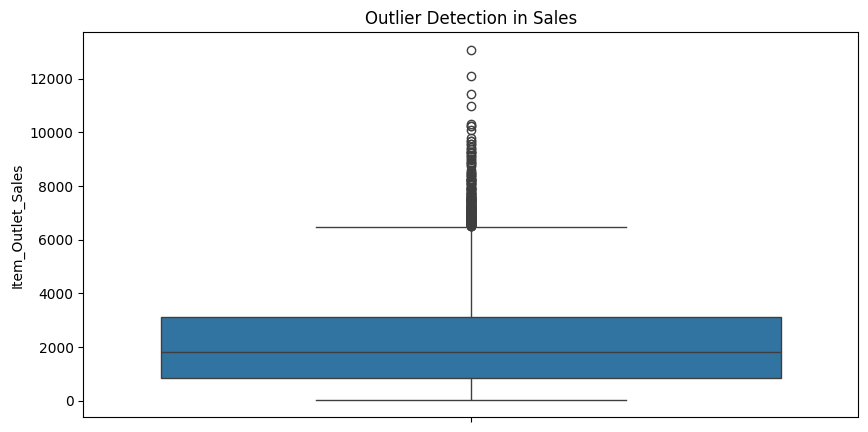

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Item_Outlet_Sales'])
plt.title("Outlier Detection in Sales")
plt.show()


In [50]:
le = LabelEncoder()
for col in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    data[col] = le.fit_transform(data[col])


In [53]:
scaler = StandardScaler()
scaled_cols = ['Item_Weight','Item_Visibility','Item_MRP']
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])


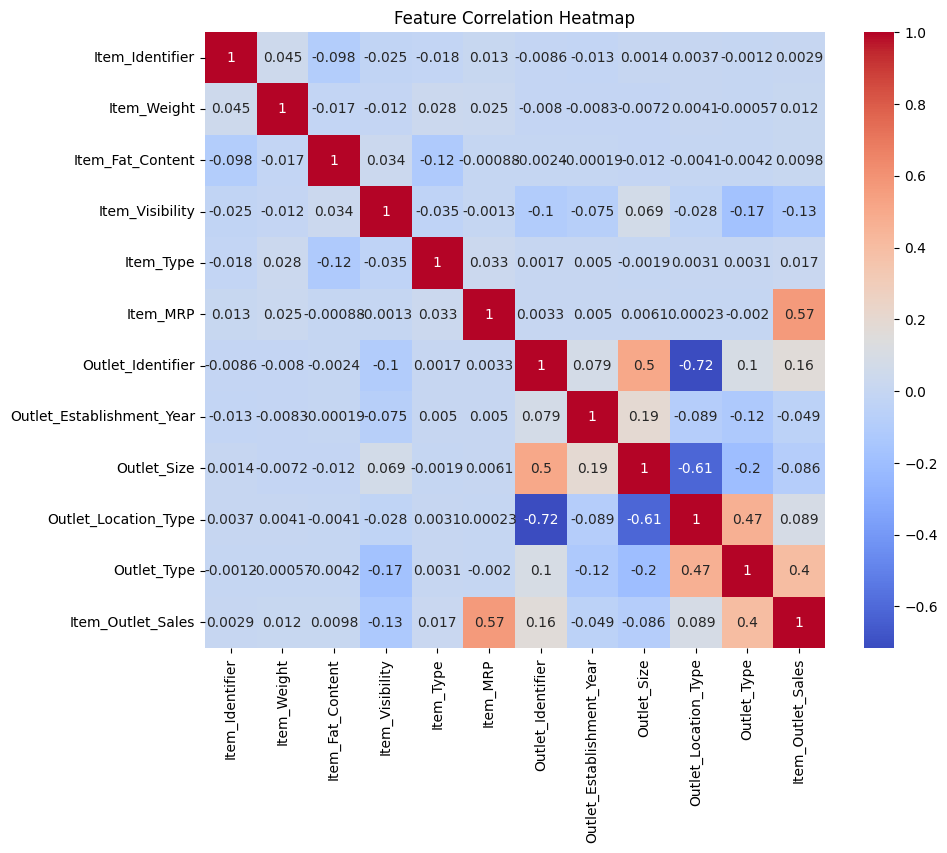

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [55]:
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression R2 Score: 0.524824818739658
MAE: 855.2499115405118
RMSE: 1136.4470595081782


In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(x_train_p, y_train_p)
y_pred_p = lr_poly.predict(x_test_p)

print("Polynomial Regression R2 Score:", r2_score(y_test_p, y_pred_p))


Polynomial Regression R2 Score: 0.6070874107387606


In [58]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)

print("MLR R2 Score:", r2_score(y_test, y_pred))


MLR R2 Score: 0.524824818739658


In [61]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Decision Tree R2 Score:", r2_score(y_test, y_pred))


Decision Tree R2 Score: 0.5771861314054597


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred))


Random Forest R2 Score: 0.562553236726635


In [66]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("KNN R2 Score:", r2_score(y_test, y_pred))


KNN R2 Score: 0.0728105329923886


array([[<Axes: title={'center': 'Item_Identifier'}>,
        <Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Fat_Content'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_Type'}>,
        <Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Identifier'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Outlet_Size'}>,
        <Axes: title={'center': 'Outlet_Location_Type'}>,
        <Axes: title={'center': 'Outlet_Type'}>,
        <Axes: title={'center': 'Item_Outlet_Sales'}>],
       [<Axes: title={'center': 'Sales_High'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

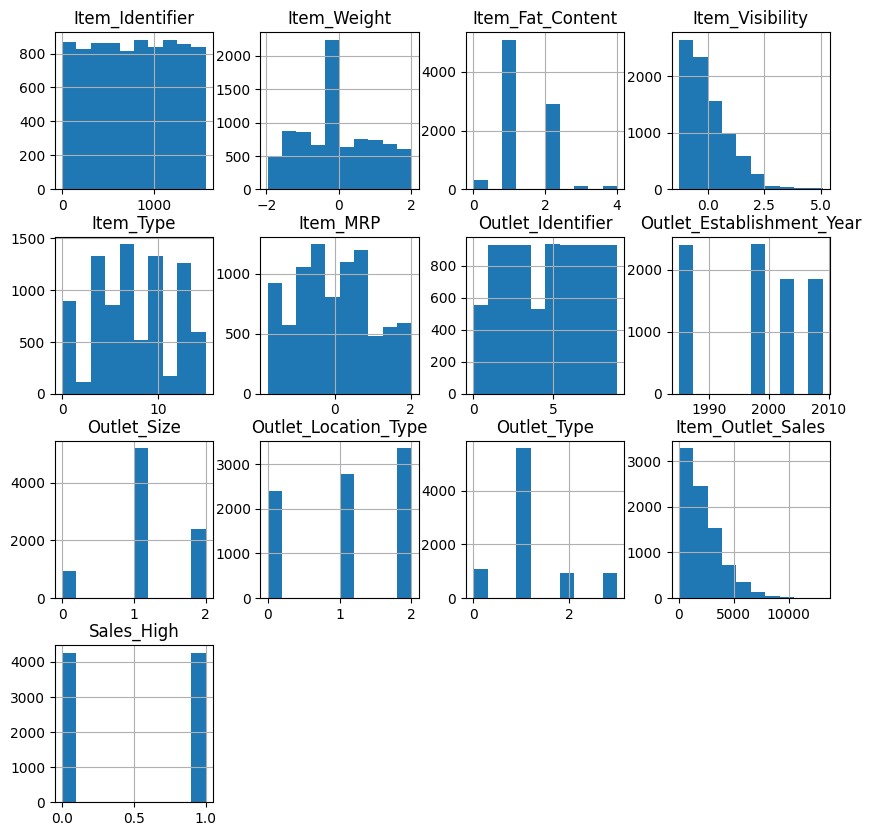

In [67]:
data.hist(figsize=(10,10))

From HISTOGRAM, It can be concluded that Outlet_Establishment_Year doesn't affect the sales much

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)

print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred))


Gradient Boosting R2 Score: 0.6044885132603199


In [69]:
models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "KNN": knn,
    "Gradient Boosting": gbr
}

results = []

for name, model in models.items():
    pred = model.predict(x_test)
    results.append([name,
                    r2_score(y_test,pred),
                    mean_absolute_error(y_test,pred),
                    np.sqrt(mean_squared_error(y_test,pred))])

result_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE", "RMSE"])
print(result_df)


               Model  R2 Score          MAE         RMSE
0  Linear Regression  0.524825   855.249912  1136.447060
1      Decision Tree  0.577186   748.821819  1072.005335
2      Random Forest  0.562553   757.799026  1090.397729
3                KNN  0.072811  1229.922148  1587.473848
4  Gradient Boosting  0.604489   723.605486  1036.816465


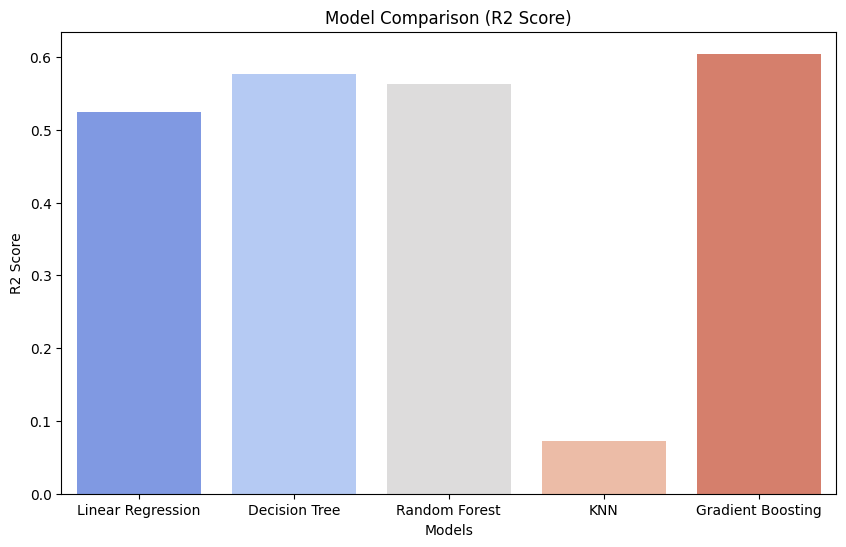

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x=result_df['Model'], y=result_df['R2 Score'], palette='coolwarm')
plt.title("Model Comparison (R2 Score)")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.show()


<Figure size 1200x600 with 0 Axes>

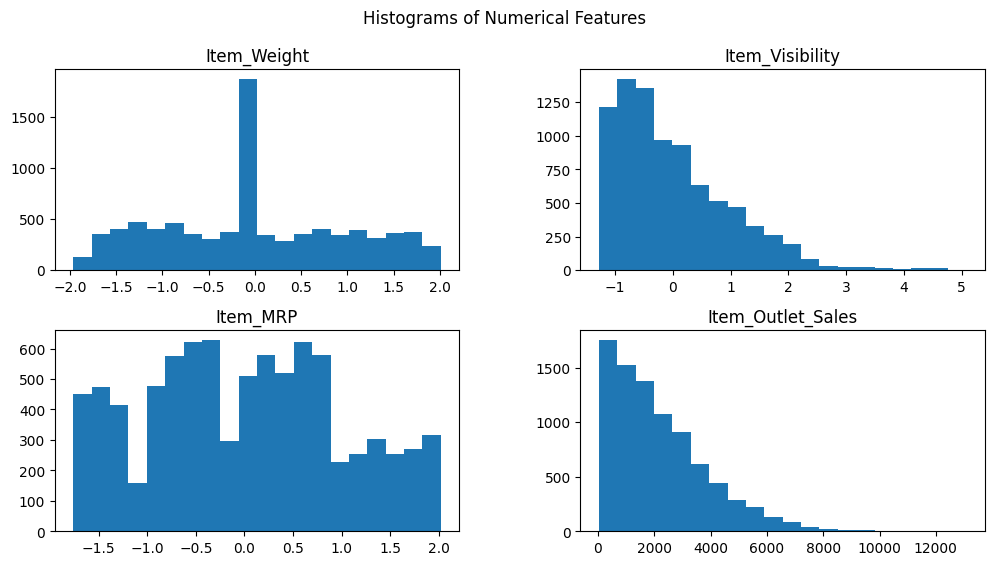

In [71]:
plt.figure(figsize=(12,6))
data[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].hist(bins=20, figsize=(12,6), grid=False)
plt.suptitle("Histograms of Numerical Features")
plt.show()


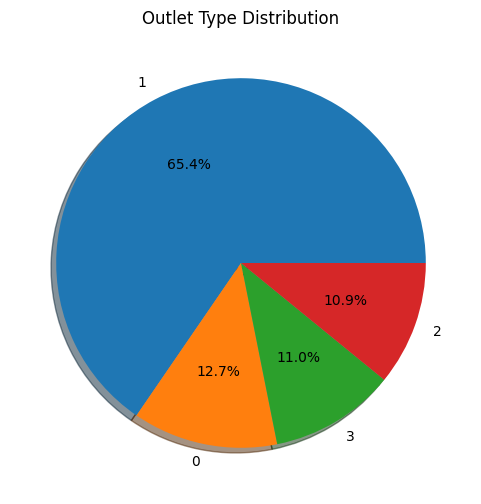

In [72]:
plt.figure(figsize=(6,6))
data['Outlet_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title("Outlet Type Distribution")
plt.ylabel("")
plt.show()
